# Setup

## Import packages

In [77]:
import pandas as pd
import numpy as np
import json 
import sys
import os
import PIL
import tensorflow as tf

### Supporting packages

In [76]:
#from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, \
                                                    img_to_array, load_img
from IPython.display import display, Image
from glob import glob

## Version check

In [4]:
print('Python: {}'.format(sys.version))
print('pandas: {}'.format(pd.__version__))
print('NumPy: {}'.format(np.__version__))
print('PIL. {}'.format(PIL.__version__))

Python: 3.8.2 (default, Apr 27 2020, 15:53:34) 
[GCC 9.3.0]
pandas: 1.0.3
NumPy: 1.18.3
PIL. 7.0.0


# Import and check data

In [5]:
full_metadata_path = 'rxrx1/rxrx1.csv'
full_meta_df = pd.read_csv(full_metadata_path)
full_meta_df.head(n=10)

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
0,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138
1,HEPG2-08_1_B02_2,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,2,negative_control,EMPTY,1138
2,HEPG2-08_1_B03_1,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,1,treatment,s21721,855
3,HEPG2-08_1_B03_2,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,2,treatment,s21721,855
4,HEPG2-08_1_B04_1,HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,B04,1,treatment,s20894,710
5,HEPG2-08_1_B04_2,HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,B04,2,treatment,s20894,710
6,HEPG2-08_1_B05_1,HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,B05,1,treatment,s19827,836
7,HEPG2-08_1_B05_2,HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,B05,2,treatment,s19827,836
8,HEPG2-08_1_B06_1,HEPG2-08_1_B06,HEPG2,test,HEPG2-08,1,B06,1,treatment,s19792,249
9,HEPG2-08_1_B06_2,HEPG2-08_1_B06,HEPG2,test,HEPG2-08,1,B06,2,treatment,s19792,249


In [6]:
full_meta_df.tail(n=10)

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
125500,U2OS-03_4_O19_1,U2OS-03_4_O19,U2OS,train,U2OS-03,4,O19,1,treatment,s223106,103
125501,U2OS-03_4_O19_2,U2OS-03_4_O19,U2OS,train,U2OS-03,4,O19,2,treatment,s223106,103
125502,U2OS-03_4_O20_1,U2OS-03_4_O20,U2OS,train,U2OS-03,4,O20,1,treatment,s223144,202
125503,U2OS-03_4_O20_2,U2OS-03_4_O20,U2OS,train,U2OS-03,4,O20,2,treatment,s223144,202
125504,U2OS-03_4_O21_1,U2OS-03_4_O21,U2OS,train,U2OS-03,4,O21,1,treatment,s20367,824
125505,U2OS-03_4_O21_2,U2OS-03_4_O21,U2OS,train,U2OS-03,4,O21,2,treatment,s20367,824
125506,U2OS-03_4_O22_1,U2OS-03_4_O22,U2OS,train,U2OS-03,4,O22,1,treatment,s195079,328
125507,U2OS-03_4_O22_2,U2OS-03_4_O22,U2OS,train,U2OS-03,4,O22,2,treatment,s195079,328
125508,U2OS-03_4_O23_1,U2OS-03_4_O23,U2OS,train,U2OS-03,4,O23,1,treatment,s21454,509
125509,U2OS-03_4_O23_2,U2OS-03_4_O23,U2OS,train,U2OS-03,4,O23,2,treatment,s21454,509


In [7]:
len(full_meta_df.sirna.unique())

1139

In [8]:
full_meta_df[full_meta_df.sirna_id == 1138]

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
0,HEPG2-08_1_B02_1,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,1,negative_control,EMPTY,1138
1,HEPG2-08_1_B02_2,HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,B02,2,negative_control,EMPTY,1138
616,HEPG2-08_2_B02_1,HEPG2-08_2_B02,HEPG2,test,HEPG2-08,2,B02,1,negative_control,EMPTY,1138
617,HEPG2-08_2_B02_2,HEPG2-08_2_B02,HEPG2,test,HEPG2-08,2,B02,2,negative_control,EMPTY,1138
1232,HEPG2-08_3_B02_1,HEPG2-08_3_B02,HEPG2,test,HEPG2-08,3,B02,1,negative_control,EMPTY,1138
...,...,...,...,...,...,...,...,...,...,...,...
123663,U2OS-03_2_B02_2,U2OS-03_2_B02,U2OS,train,U2OS-03,2,B02,2,negative_control,EMPTY,1138
124278,U2OS-03_3_B02_1,U2OS-03_3_B02,U2OS,train,U2OS-03,3,B02,1,negative_control,EMPTY,1138
124279,U2OS-03_3_B02_2,U2OS-03_3_B02,U2OS,train,U2OS-03,3,B02,2,negative_control,EMPTY,1138
124894,U2OS-03_4_B02_1,U2OS-03_4_B02,U2OS,train,U2OS-03,4,B02,1,negative_control,EMPTY,1138


In [9]:
len(full_meta_df.sirna_id.unique())

1139

In [10]:
len(full_meta_df.well_type.unique())

3

In [11]:
full_meta_df.well_type.unique()

array(['negative_control', 'treatment', 'positive_control'], dtype=object)

In [12]:
parsed_df = pd.read_csv('parsed_data_files/new_train.csv')
parsed_df.head()

,id_code,experiment,plate,well,sirna,filename
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513,HEPG2-01_1_B03_s1.jpeg
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840,HEPG2-01_1_B04_s1.jpeg
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020,HEPG2-01_1_B05_s1.jpeg
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254,HEPG2-01_1_B06_s1.jpeg
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144,HEPG2-01_1_B07_s1.jpeg


In [13]:
parsed_test_df = pd.read_csv('parsed_data_files/new_test.csv')
parsed_test_df.head()

,id_code,experiment,plate,well,filename
0,HEPG2-08_1_B03,HEPG2-08,1,B03,HEPG2-08_1_B03_s1.jpeg
1,HEPG2-08_1_B04,HEPG2-08,1,B04,HEPG2-08_1_B04_s1.jpeg
2,HEPG2-08_1_B05,HEPG2-08,1,B05,HEPG2-08_1_B05_s1.jpeg
3,HEPG2-08_1_B06,HEPG2-08,1,B06,HEPG2-08_1_B06_s1.jpeg
4,HEPG2-08_1_B07,HEPG2-08,1,B07,HEPG2-08_1_B07_s1.jpeg


## Filter to keep treatment rows

In [14]:
treatments_df = full_meta_df[full_meta_df.well_type == 'treatment'].copy()

In [15]:
len(treatments_df)

112824

In [16]:
len(treatments_df.sirna_id.unique()) # check how many treatments total, should be 1108

1108

# EDA

In [17]:
len(treatments_df[treatments_df.sirna_id == 888])

100

In [18]:
len(treatments_df[treatments_df.sirna_id == 999])

102

In [19]:
len(treatments_df[treatments_df.sirna_id == 111])

102

In [20]:
cell_types = list(treatments_df.cell_type.unique())

In [21]:
len(treatments_df[treatments_df.cell_type == cell_types[0]])

24358

In [22]:
hepg2_df = treatments_df[treatments_df.cell_type == cell_types[0]]
hepg2_df.head()

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
2,HEPG2-08_1_B03_1,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,1,treatment,s21721,855
3,HEPG2-08_1_B03_2,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,2,treatment,s21721,855
4,HEPG2-08_1_B04_1,HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,B04,1,treatment,s20894,710
5,HEPG2-08_1_B04_2,HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,B04,2,treatment,s20894,710
6,HEPG2-08_1_B05_1,HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,B05,1,treatment,s19827,836


In [23]:
hepg2_df[(hepg2_df.well == 'B03') & (hepg2_df.experiment == 'HEPG2-07') & (hepg2_df.sirna_id == 239)]

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
59072,HEPG2-07_1_B03_1,HEPG2-07_1_B03,HEPG2,train,HEPG2-07,1,B03,1,treatment,s28299,239
59073,HEPG2-07_1_B03_2,HEPG2-07_1_B03,HEPG2,train,HEPG2-07,1,B03,2,treatment,s28299,239


In [24]:
parsed_df[(parsed_df.experiment == 'HEPG2-07') & (parsed_df.sirna == 239)]

,id_code,experiment,plate,well,sirna,filename
6644,HEPG2-07_1_B03,HEPG2-07,1,B03,239,HEPG2-07_1_B03_s1.jpeg
43159,HEPG2-07_1_B03,HEPG2-07,1,B03,239,HEPG2-07_1_B03_s2.jpeg


In [25]:
len(parsed_df.experiment.unique())

33

In [26]:
len(parsed_df)

73030

In [27]:
train_df = treatments_df[treatments_df.dataset == 'train'].copy()
test_df = treatments_df[treatments_df.dataset == 'test'].copy()

In [28]:
len(test_df)

39794

In [29]:
len(train_df)

73030

In [30]:
parsed_test_df = pd.read_csv('parsed_data_files/new_test.csv')
len(parsed_test_df)

39794

In [31]:
print(os.getcwd())
print(os.listdir())

/home/specc/Documents/school_files/458_deep_learning/458_final_project
['parsed_data_files', '.vscode', 'data_loading_and_eda.ipynb', 'notes.md', '.git', 'README.md', 'data_files', 'rxrx1', '254482_535150_bundle_archive.zip', 'modeling_experiments.ipynb', 'rxrx1-utils', 'recursion-2019-load-resize-and-save-images.ipynb']


In [32]:
train_df.head()

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
44288,HEPG2-01_1_B03_1,HEPG2-01_1_B03,HEPG2,train,HEPG2-01,1,B03,1,treatment,s28745,513
44289,HEPG2-01_1_B03_2,HEPG2-01_1_B03,HEPG2,train,HEPG2-01,1,B03,2,treatment,s28745,513
44290,HEPG2-01_1_B04_1,HEPG2-01_1_B04,HEPG2,train,HEPG2-01,1,B04,1,treatment,s28710,840
44291,HEPG2-01_1_B04_2,HEPG2-01_1_B04,HEPG2,train,HEPG2-01,1,B04,2,treatment,s28710,840
44292,HEPG2-01_1_B05_1,HEPG2-01_1_B05,HEPG2,train,HEPG2-01,1,B05,1,treatment,s28834,1020


In [33]:
test_df.head()

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
2,HEPG2-08_1_B03_1,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,1,treatment,s21721,855
3,HEPG2-08_1_B03_2,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,2,treatment,s21721,855
4,HEPG2-08_1_B04_1,HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,B04,1,treatment,s20894,710
5,HEPG2-08_1_B04_2,HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,B04,2,treatment,s20894,710
6,HEPG2-08_1_B05_1,HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,B05,1,treatment,s19827,836


In [34]:
parsed_df[(parsed_df.sirna == 513) & (parsed_df.experiment == 'HEPG2-01')]

,id_code,experiment,plate,well,sirna,filename
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513,HEPG2-01_1_B03_s1.jpeg
36515,HEPG2-01_1_B03,HEPG2-01,1,B03,513,HEPG2-01_1_B03_s2.jpeg


In [35]:
parsed_test_df.head()

,id_code,experiment,plate,well,filename
0,HEPG2-08_1_B03,HEPG2-08,1,B03,HEPG2-08_1_B03_s1.jpeg
1,HEPG2-08_1_B04,HEPG2-08,1,B04,HEPG2-08_1_B04_s1.jpeg
2,HEPG2-08_1_B05,HEPG2-08,1,B05,HEPG2-08_1_B05_s1.jpeg
3,HEPG2-08_1_B06,HEPG2-08,1,B06,HEPG2-08_1_B06_s1.jpeg
4,HEPG2-08_1_B07,HEPG2-08,1,B07,HEPG2-08_1_B07_s1.jpeg


In [36]:
len(parsed_test_df) == len(test_df)

True

In [37]:
len(parsed_test_df)

39794

In [38]:
len(test_df)

39794

In [39]:
parsed_test_df.rename(columns = {'id_code': 'well_id'}, inplace = True)

In [40]:
parsed_test_df = parsed_test_df.merge(test_df, on = ['well_id', 'experiment', 'well', 'plate'], how = 'left')

In [41]:
parsed_test_df.columns

Index(['well_id', 'experiment', 'plate', 'well', 'filename', 'site_id',
       'cell_type', 'dataset', 'site', 'well_type', 'sirna', 'sirna_id'],
      dtype='object')

In [42]:
len(parsed_test_df)

79588

In [43]:
parsed_test_df = parsed_test_df.drop(columns = ['site_id', 'dataset', 'well_type', 'site']).drop_duplicates()

In [44]:
parsed_test_df['site'] = 0

In [45]:
def assign_site(str_input):
    if 's1' in str_input:
        return 1
    elif 's2' in str_input:
        return 2

In [46]:
parsed_test_df

,well_id,experiment,plate,well,filename,cell_type,sirna,sirna_id,site
0,HEPG2-08_1_B03,HEPG2-08,1,B03,HEPG2-08_1_B03_s1.jpeg,HEPG2,s21721,855,0
2,HEPG2-08_1_B04,HEPG2-08,1,B04,HEPG2-08_1_B04_s1.jpeg,HEPG2,s20894,710,0
4,HEPG2-08_1_B05,HEPG2-08,1,B05,HEPG2-08_1_B05_s1.jpeg,HEPG2,s19827,836,0
6,HEPG2-08_1_B06,HEPG2-08,1,B06,HEPG2-08_1_B06_s1.jpeg,HEPG2,s19792,249,0
8,HEPG2-08_1_B07,HEPG2-08,1,B07,HEPG2-08_1_B07_s1.jpeg,HEPG2,s19935,878,0
...,...,...,...,...,...,...,...,...,...
79578,U2OS-05_4_O19,U2OS-05,4,O19,U2OS-05_4_O19_s2.jpeg,U2OS,s19163,643,0
79580,U2OS-05_4_O20,U2OS-05,4,O20,U2OS-05_4_O20_s2.jpeg,U2OS,s19139,777,0
79582,U2OS-05_4_O21,U2OS-05,4,O21,U2OS-05_4_O21_s2.jpeg,U2OS,s18196,375,0
79584,U2OS-05_4_O22,U2OS-05,4,O22,U2OS-05_4_O22_s2.jpeg,U2OS,s18694,394,0


In [47]:
parsed_test_df['site'] = parsed_test_df.filename.apply(assign_site)

In [48]:
len(parsed_test_df)

39794

In [49]:
parsed_test_df[(parsed_test_df.sirna_id == 855) & (parsed_test_df.experiment == 'HEPG2-08')]

,well_id,experiment,plate,well,filename,cell_type,sirna,sirna_id,site
0,HEPG2-08_1_B03,HEPG2-08,1,B03,HEPG2-08_1_B03_s1.jpeg,HEPG2,s21721,855,1
39794,HEPG2-08_1_B03,HEPG2-08,1,B03,HEPG2-08_1_B03_s2.jpeg,HEPG2,s21721,855,2


In [50]:
parsed_test_df = parsed_test_df.drop(columns = ['cell_type', 'sirna', 'site'])

In [51]:
parsed_df.head()

,id_code,experiment,plate,well,sirna,filename
0,HEPG2-01_1_B03,HEPG2-01,1,B03,513,HEPG2-01_1_B03_s1.jpeg
1,HEPG2-01_1_B04,HEPG2-01,1,B04,840,HEPG2-01_1_B04_s1.jpeg
2,HEPG2-01_1_B05,HEPG2-01,1,B05,1020,HEPG2-01_1_B05_s1.jpeg
3,HEPG2-01_1_B06,HEPG2-01,1,B06,254,HEPG2-01_1_B06_s1.jpeg
4,HEPG2-01_1_B07,HEPG2-01,1,B07,144,HEPG2-01_1_B07_s1.jpeg


In [52]:
parsed_test_df.head()

,well_id,experiment,plate,well,filename,sirna_id
0,HEPG2-08_1_B03,HEPG2-08,1,B03,HEPG2-08_1_B03_s1.jpeg,855
2,HEPG2-08_1_B04,HEPG2-08,1,B04,HEPG2-08_1_B04_s1.jpeg,710
4,HEPG2-08_1_B05,HEPG2-08,1,B05,HEPG2-08_1_B05_s1.jpeg,836
6,HEPG2-08_1_B06,HEPG2-08,1,B06,HEPG2-08_1_B06_s1.jpeg,249
8,HEPG2-08_1_B07,HEPG2-08,1,B07,HEPG2-08_1_B07_s1.jpeg,878


In [53]:
test_df[(test_df.sirna_id == 855) & (test_df.experiment == 'HEPG2-08')]

,site_id,well_id,cell_type,dataset,experiment,plate,well,site,well_type,sirna,sirna_id
2,HEPG2-08_1_B03_1,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,1,treatment,s21721,855
3,HEPG2-08_1_B03_2,HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,B03,2,treatment,s21721,855


In [54]:
# parsed_df.to_csv('data_files/train.csv')
# parsed_test_df.to_csv('data_files/test.csv')

# Check some images with the same labels

In [86]:
view_df = parsed_df[(parsed_df.sirna == 18) & (parsed_df.experiment.str.contains('HUVEC'))].iloc[:10].copy()
view_df

,id_code,experiment,plate,well,sirna,filename
8599,HUVEC-01_4_B21,HUVEC-01,4,B21,18,HUVEC-01_4_B21_s1.jpeg
9916,HUVEC-02_4_M16,HUVEC-02,4,M16,18,HUVEC-02_4_M16_s1.jpeg
10997,HUVEC-03_4_L07,HUVEC-03,4,L07,18,HUVEC-03_4_L07_s1.jpeg
12177,HUVEC-04_4_O19,HUVEC-04,4,O19,18,HUVEC-04_4_O19_s1.jpeg
13209,HUVEC-05_4_L03,HUVEC-05,4,L03,18,HUVEC-05_4_L03_s1.jpeg
14174,HUVEC-06_4_D19,HUVEC-06,4,D19,18,HUVEC-06_4_D19_s1.jpeg
14752,HUVEC-07_2_E21,HUVEC-07,2,E21,18,HUVEC-07_2_E21_s1.jpeg
16385,HUVEC-08_4_D15,HUVEC-08,4,D15,18,HUVEC-08_4_D15_s1.jpeg
17299,HUVEC-09_3_H21,HUVEC-09,3,H21,18,HUVEC-09_3_H21_s1.jpeg
18332,HUVEC-10_3_D23,HUVEC-10,3,D23,18,HUVEC-10_3_D23_s1.jpeg


In [87]:
view_df['filepath'] = 'data_files/train/' + view_df.filename

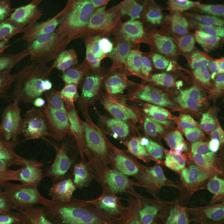

In [88]:
Image(view_df.filepath.iloc[0])

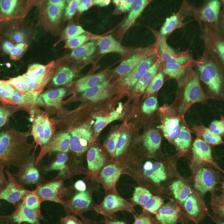

In [89]:
Image(view_df.filepath.iloc[1])

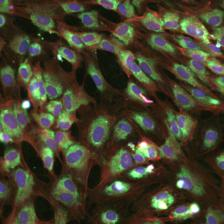

In [90]:
Image(view_df.filepath.iloc[2])

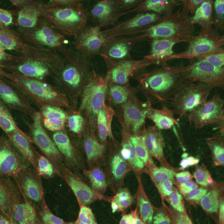

In [91]:
Image(view_df.filepath.iloc[3])

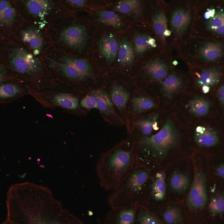

In [92]:
Image(view_df.filepath.iloc[4])

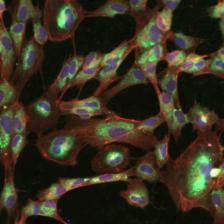

In [93]:
Image(view_df.filepath.iloc[5])

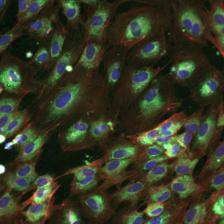

In [94]:
Image(view_df.filepath.iloc[-1])

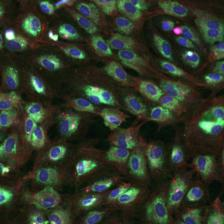

In [95]:
Image(view_df.filepath.iloc[-2])